# The Data
In this project We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## Goal
Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!
The "loan_status" column contains our label.

## Loading the data and other imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [5]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**

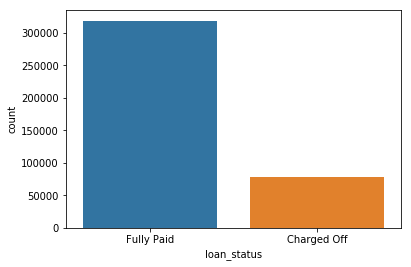

In [7]:
sns.countplot(x ='loan_status' ,data = df)

We notice that the data is not balanced.

Created a histogram of the loan_amnt column

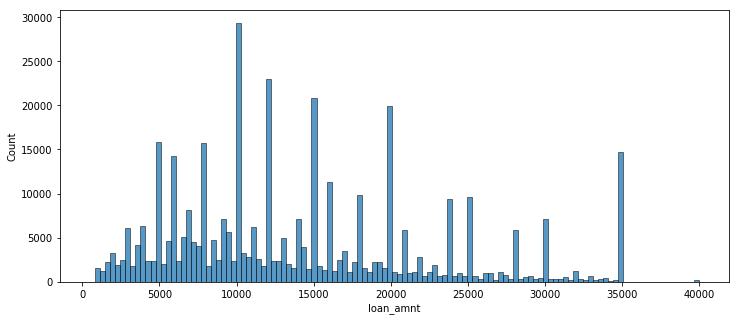

In [8]:
plt.figure(figsize = (12,5))
sns.histplot(x = 'loan_amnt', data=df)

Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [9]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


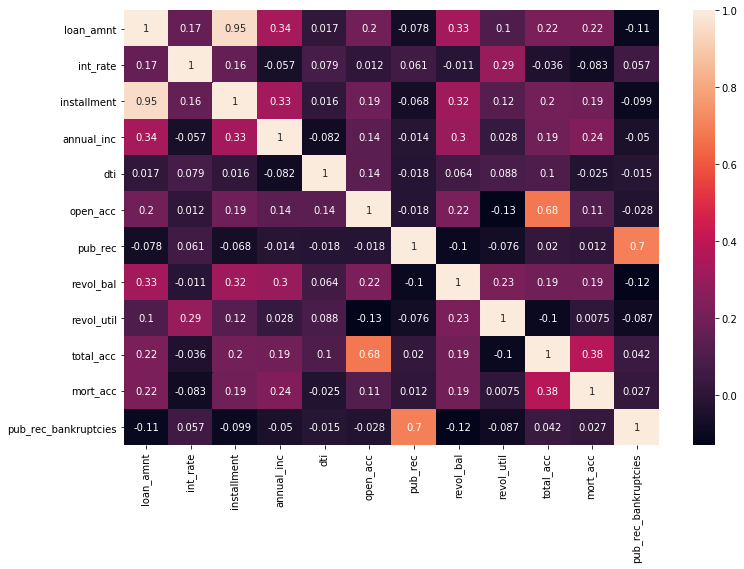

In [10]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot=True)

It seems that there is a strong correlation between installment and the loan amount

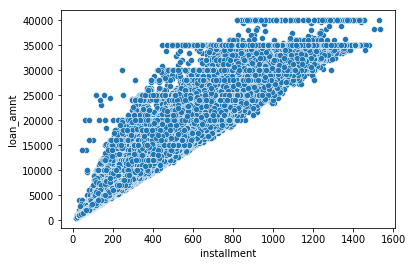

In [11]:
sns.scatterplot(x ='installment' , y ='loan_amnt', data=df)

Is there a relationship between loan status and loan amount?

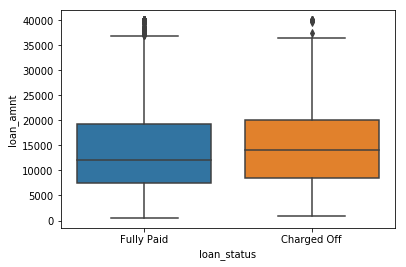

In [12]:
sns.boxplot(x ='loan_status' , y ='loan_amnt', data=df)

We calculated the summary statistics for the loan amount, grouped by the loan_status

In [13]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans.

In [14]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

In [15]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

Checking if the grade has anything to do with the loan status?

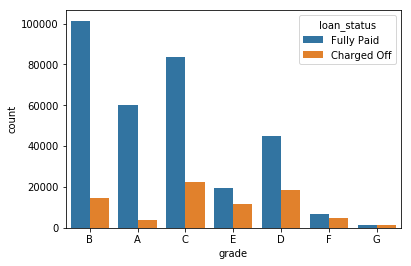

In [16]:
sns.countplot(x ='grade',data=df ,hue='loan_status')

Let's look more into this:

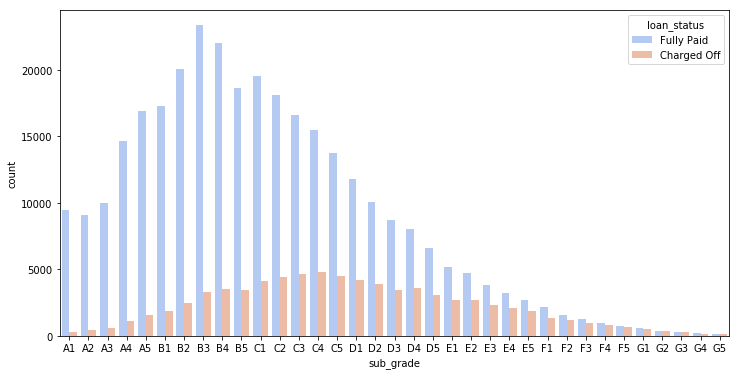

In [17]:
plt.figure(figsize = (12,6))
sub_grade_ordered = sorted(df['sub_grade'].unique())
sns.countplot(x ='sub_grade', data = df, order = sub_grade_ordered, palette='coolwarm', hue = 'loan_status')

 It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.

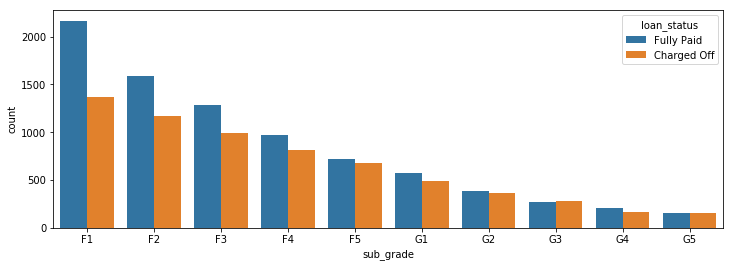

In [18]:
plt.figure(figsize=(12,4))
df1 = df[(df['grade'] == 'F') |(df['grade'] == 'G')]
f_g_ordered = sorted(df1['sub_grade'].unique())

sns.countplot(x = 'sub_grade' , data = df1, order= f_g_ordered, hue = 'loan_status')

It seems that that the amount of loans being paid for G5 class is almost the same as Charged Fully.

Let's prepare our data more:

In [19]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

A bar plot is. created showing the correlation of the numeric features to the new loan_repaid column

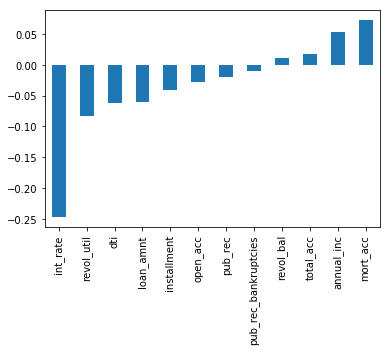

In [20]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot.bar()

It seems that interest rate has the most negative relationship with the loan being repaid. Which makes sense.

# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**

In [21]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

In [22]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Let's see how much is the percentage of each missing data

In [23]:
df.isnull().sum()/len(df) *100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

Let's examine emp_title and emp_length to see whether it will be okay to drop them.

In [24]:
df['emp_title'].nunique()

173105

In [25]:
df['emp_title'].value_counts()

Teacher                                4389
Manager                                4250
Registered Nurse                       1856
RN                                     1846
Supervisor                             1830
Sales                                  1638
Project Manager                        1505
Owner                                  1410
Driver                                 1339
Office Manager                         1218
manager                                1145
Director                               1089
General Manager                        1074
Engineer                                995
teacher                                 962
driver                                  882
Vice President                          857
Operations Manager                      763
Administrative Assistant                756
Accountant                              748
President                               742
owner                                   697
Account Manager                 

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column

In [26]:
df = df.drop('emp_title' , axis = 1)

In [27]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [28]:
ordered_emp_length = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

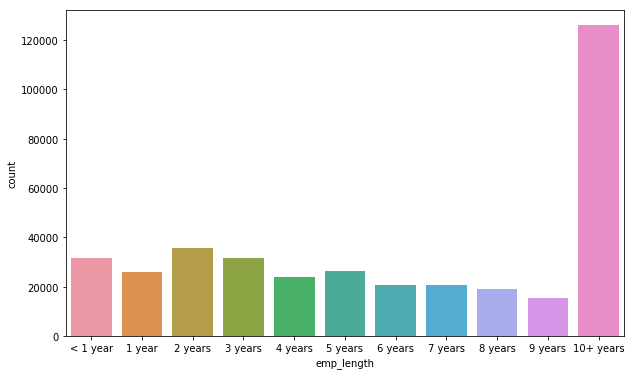

In [29]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'emp_length' , data = df, order = ordered_emp_length)

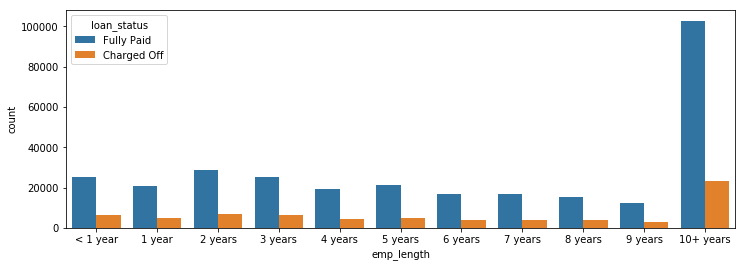

In [30]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=ordered_emp_length,hue='loan_status')

This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.

In [31]:
emp_notpay_ratio = 1-(df.groupby('emp_length')['loan_repaid'].sum()/df.groupby('emp_length')['loan_repaid'].count())

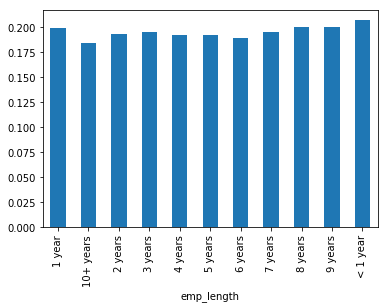

In [32]:
emp_notpay_ratio.plot.bar()

Charge off rates are extremely similar across all employment lengths. So we go ahead and drop the emp_length column.

In [33]:
df = df.drop('emp_length', axis = 1)

Let's revisit the DataFrame to see what feature columns still have missing data

In [34]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Let's review the title column vs the purpose column to see if it is repeated information?

In [35]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [36]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

The title column is simply a string subcategory/description of the purpose column. So we go ahead and drop the title column

In [37]:
df = df.drop('title' , axis = 1)

Let's check out the mortgage account feauture.

In [38]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

Let's review the other columsn to see which most highly correlates to mort_acc

In [39]:
df.corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.

In [40]:
df.groupby('total_acc').mean()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,loan_repaid
total_acc,,,,,,,,,,,,
2.0,6672.222222,15.801111,210.881667,64277.777778,2.279444,1.611111,0.000000,2860.166667,53.527778,0.000000,0.000000,0.777778
3.0,6042.966361,15.615566,198.728318,41270.753884,6.502813,2.611621,0.045872,3382.807339,49.991022,0.052023,0.015480,0.779817
4.0,7587.399031,15.069491,250.050194,42426.565969,8.411963,3.324717,0.041195,4874.231826,58.477400,0.066743,0.022951,0.785945
5.0,7845.734714,14.917564,256.190325,44394.098003,10.118328,3.921598,0.071499,5475.253452,56.890311,0.103289,0.041171,0.796844
6.0,8529.019843,14.651752,278.518228,48470.001156,11.222542,4.511119,0.104003,6546.374957,57.812483,0.151293,0.055077,0.784126
7.0,9350.283611,14.415810,301.320234,50623.501002,11.829829,5.093169,0.116099,7363.941588,56.787540,0.221695,0.062818,0.788800
8.0,9788.345760,14.271851,314.772509,52571.393657,12.684623,5.576887,0.143523,7850.161603,57.348173,0.308422,0.081491,0.782293
9.0,10042.600597,14.244870,321.595479,52572.312693,13.296349,6.028765,0.161584,8205.770041,56.583065,0.365499,0.093518,0.786859
10.0,10487.255605,14.109811,334.611747,55751.004093,14.004592,6.466111,0.146507,9124.531283,57.029202,0.429158,0.093926,0.794447


In [41]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [42]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [43]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

Let's check the missing values again:

In [44]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. So we remove the rows that are missing those values in those columns:

In [45]:
df = df.dropna()

In [46]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

In [47]:
df.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
Let's now go through all the string features to see what we should do with them.

---


### term feature

Let's convert the term feature into either a 36 or 60 integer numeric data type

In [48]:
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))

In [49]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

### grade feature

We already know grade is part of sub_grade, so just drop the grade feature.

In [50]:
df = df.drop('grade', axis =1)

Here we convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.

In [51]:
sub_grade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

In [52]:
df = pd.concat([df.drop('sub_grade',axis=1),sub_grade_dummies],axis=1)

### verification_status, application_type,initial_list_status,purpose 
We will convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe.

In [53]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

### home_ownership
Let's review the value_counts for the home_ownership column.

In [54]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

We are going to convert these to dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. 

In [55]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
dummies =pd.get_dummies(df['home_ownership'], drop_first= True)
df = pd.concat ([df.drop('home_ownership', axis =1), dummies], axis =1)

### address
Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.

In [56]:
df['zip_code'] = df['address'].apply(lambda x:x.split()[-1])

Now we make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.

In [57]:
dummies =pd.get_dummies(df['zip_code'], drop_first= True)
df = pd.concat([df.drop(['zip_code', 'address'], axis =1), dummies],axis = 1)

### issue_d 
This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [58]:
df = df.drop('issue_d', axis =1)

### earliest_cr_line
This appears to be a historical time stamp feature. We will extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.

In [59]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x:int(x.split('-')[-1]))

In [60]:
df = df.drop('earliest_cr_line', axis = 1)

Check what other string features are left?

In [61]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

## Train Test Split

In [62]:
from sklearn.model_selection import train_test_split

We drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.

In [63]:
df = df.drop('loan_status',axis = 1)

Here we set X and y variables to the .values of the features and label.

In [64]:
X = df.drop('loan_repaid',axis = 1).values
y = df['loan_repaid'].values

## Grabbing a Sample for Training Time

 We grab a sample of the 490k+ entries to save time on training.

In [65]:
df = df.sample(frac=0.1,random_state=101)
print(len(df))

39522


We perform a train/test split with test_size=0.2 and a random_state of 101.

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

Here we use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

Here we build a sequential model to be trained on the data. There are unlimited options, but here is what we use: a model that goes 78 --> 39 --> 19--> 1 output neuron. 

In [78]:
model = Sequential()


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


We fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting and check for over fitting later. We also add in a batch_size of 256.

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 316175 samples, validate on 79044 samples
Epoch 1/5


# Section 3: Evaluating Model Performance.

We plot out the validation loss versus the training loss.

In [1]:
losses = pd.DataFrame(model.history.history)

NameError: name 'pd' is not defined

In [2]:
losses[['loss','val_loss']].plot()

NameError: name 'losses' is not defined

Now, we create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.

In [3]:
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
predictions = model.predict_classes(X_test)

NameError: name 'model' is not defined

In [5]:
print(classification_report(y_test,predictions))

NameError: name 'y_test' is not defined

In [6]:
confusion_matrix(y_test,predictions)

NameError: name 'y_test' is not defined

In [2]:
df['loan_repaid'].value_counts()

NameError: name 'df' is not defined

In [3]:
317696/len(df)

NameError: name 'df' is not defined

## Concolusion
As we see the accuracy is almost 90 percent which doesn't guarantee our model is ghood since as shown before, the dataset is not balanced. What's more the confusion matrix shows many 0 values being mislabeled. Which explains the low recall.
But if we check the amount of 'fully paid' cases vs all cases we have almost 80 percent of loans being fully paid and since our model has more than that accuracy, it is still a good model.